## 2.3.7　カーネル法を用いたサポートベクトルマシン

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

### 2.3.7.1　線形モデルと非線形特徴量

Text(0, 0.5, 'Feature 1')

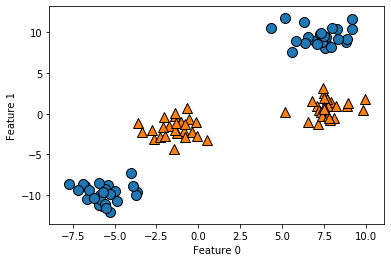

In [48]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

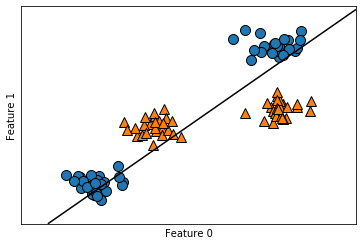

In [49]:
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [50]:
# 特徴量が2つあるデータXと、2乗したものを結合（結合のためにX[:, 1]の次元を増やす必要がある）
X_new = np.hstack([X, X[:, 1:] ** 2])

Text(0.5, 0, 'feature1 ** 2')

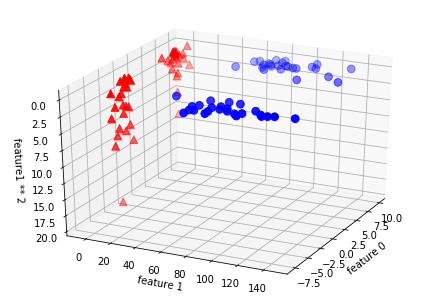

In [51]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 ** 2')

In [52]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature ** 2')

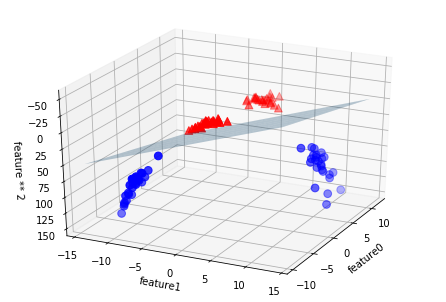

In [53]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature ** 2')

Text(0, 0.5, 'Feature 1')

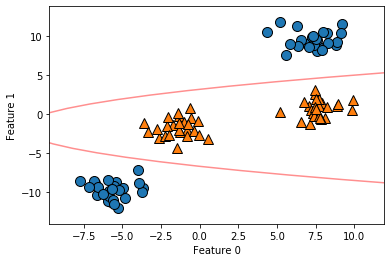

In [54]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### 2.3.7.3　SVMを理解する

In [55]:
X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

Text(0, 0.5, 'Feature 1')

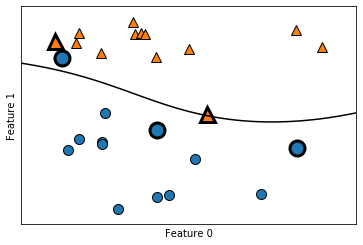

In [56]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### 2.3.7.4　SVMパラメータの調整

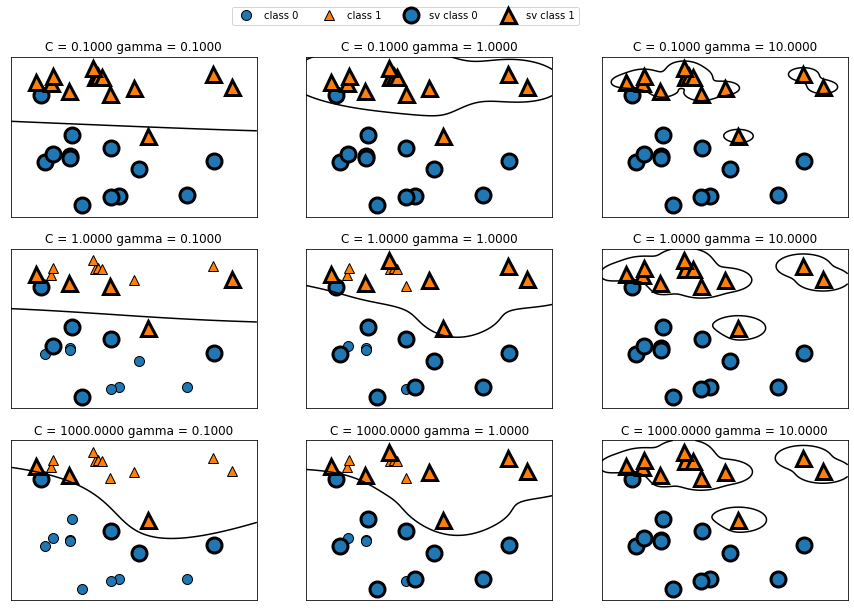

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'], ncol=4, loc=(.9, 1.2))

In [58]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print('Accuracy on training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(svc.score(X_train, y_train)))

Accuracy on training set: 0.90
Accuracy on test set: 0.90


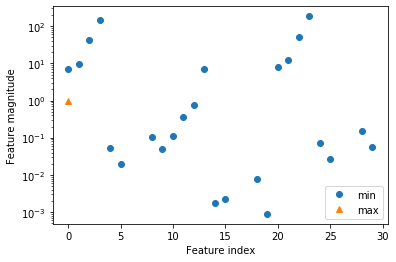

In [59]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(y_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.yscale('log')

### 2.3.7.5　SVMのためのデータの前処理

In [60]:
# 特徴量ごとに最小値を計算
min_on_training = X_train.min(axis=0)

# 特徴量ごとに（最大値-最小値）を計算
range_on_training = (X_train - min_on_training).max(axis=0)

In [61]:
X_train_scaled = (X_train - min_on_training) / range_on_training

print('Minimum for each feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Minimum for each feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Minimum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [62]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [63]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [64]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958
